# Introduction

Find the relationship between EMA5,EMA13 and RSI to formulate a trading strategy which will trade bitcoin, USDT


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Read the Data

Download and add the .csv files. Analyze them

In [3]:
df_btcusd = pd.read_csv('20210102_222158BTCUSDT_rsi.csv')

# Data Exploration
Explore the data

In [4]:
df_btcusd.head()

,timestamp,price,rsi,5EMA,13EMA
0,1609626900000,32183.39,67.117057,32220.070412,32144.504254
1,1609626960000,32211.22,68.279535,32217.120275,32154.035075
2,1609627020000,32267.10,70.532168,32233.780183,32170.187207
3,1609627080000,32207.12,65.181478,32224.893455,32175.463321
4,1609627140000,32240.19,66.682236,32229.992304,32184.709989


In [7]:
df_btcusd.shape

(227, 5)

# Data Cleaning

Change timestamp utc values to datetime and clean up any Nans

In [12]:
df_btcusd['Date'] = df_btcusd['timestamp']

In [13]:
df_btcusd.shape

(227, 6)

In [22]:
df_btcusd['Date']= pd.to_datetime(df_btcusd['timestamp'],unit='ms')

In [24]:
df_btcusd

,timestamp,price,rsi,5EMA,13EMA,Date
0,1609626900000,32183.39,67.117057,32220.070412,32144.504254,2021-01-02 22:35:00
1,1609626960000,32211.22,68.279535,32217.120275,32154.035075,2021-01-02 22:36:00
2,1609627020000,32267.10,70.532168,32233.780183,32170.187207,2021-01-02 22:37:00
3,1609627080000,32207.12,65.181478,32224.893455,32175.463321,2021-01-02 22:38:00
4,1609627140000,32240.19,66.682236,32229.992304,32184.709989,2021-01-02 22:39:00
...,...,...,...,...,...,...
222,1609640220000,32622.29,46.115943,32626.219699,32641.635908,2021-01-03 02:17:00
223,1609640280000,32663.96,51.738994,32638.799800,32644.825064,2021-01-03 02:18:00
224,1609640340000,32732.81,59.296942,32670.136533,32657.394340,2021-01-03 02:19:00
225,1609640400000,32699.74,54.853431,32680.004355,32663.443720,2021-01-03 02:20:00


In [26]:
df_btcusd.isna().values.sum()

0

# Data Visualisation
Visualise the different aspects of price vs rsi vs ema
1. Seaborn scatter plots for rsi, ema5, ema13
2. Crossover plots using lines

Seaborn plot with 5EMA, 13EMA as hue and size to complement rsi with colour.

<AxesSubplot:xlabel='Date', ylabel='price'>

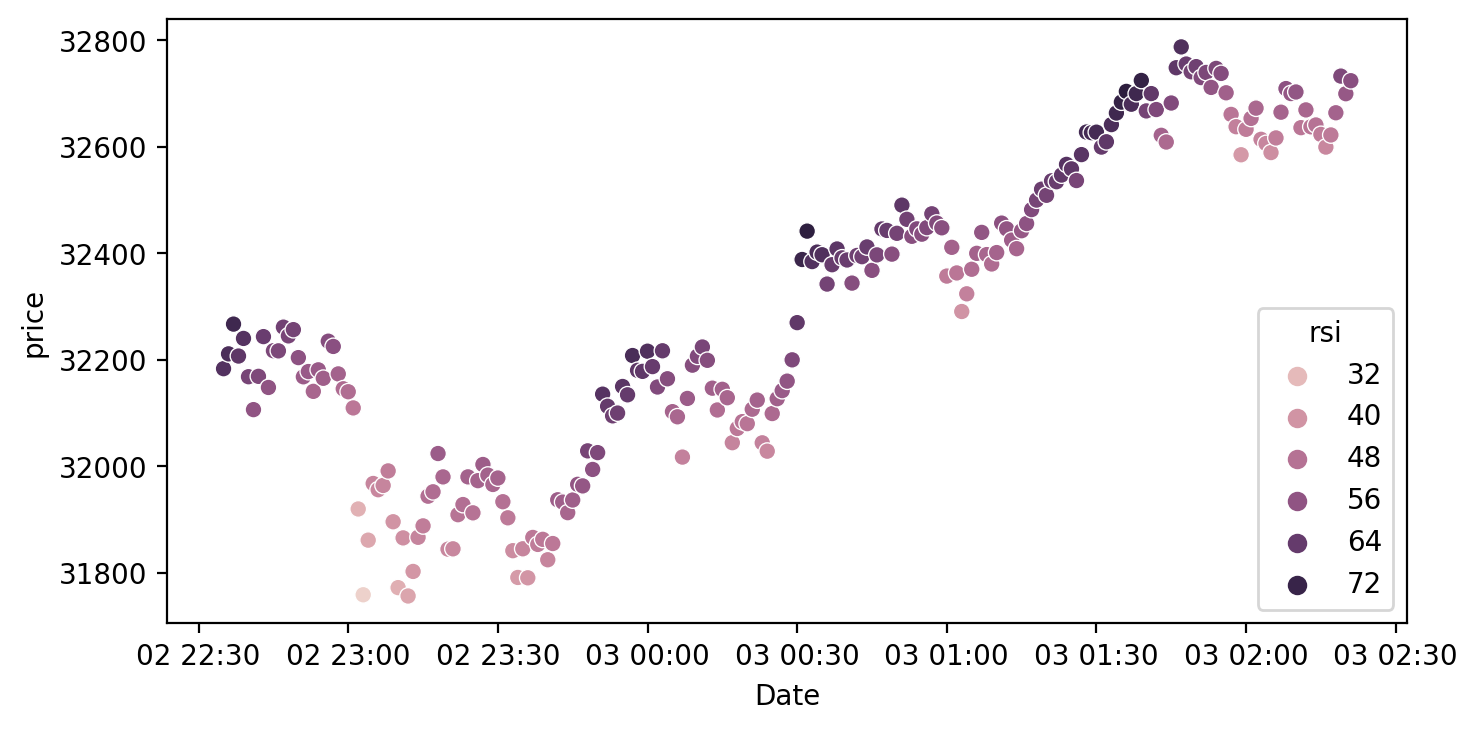

In [29]:
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(data=df_btcusd,x='Date',y='price',hue='rsi')

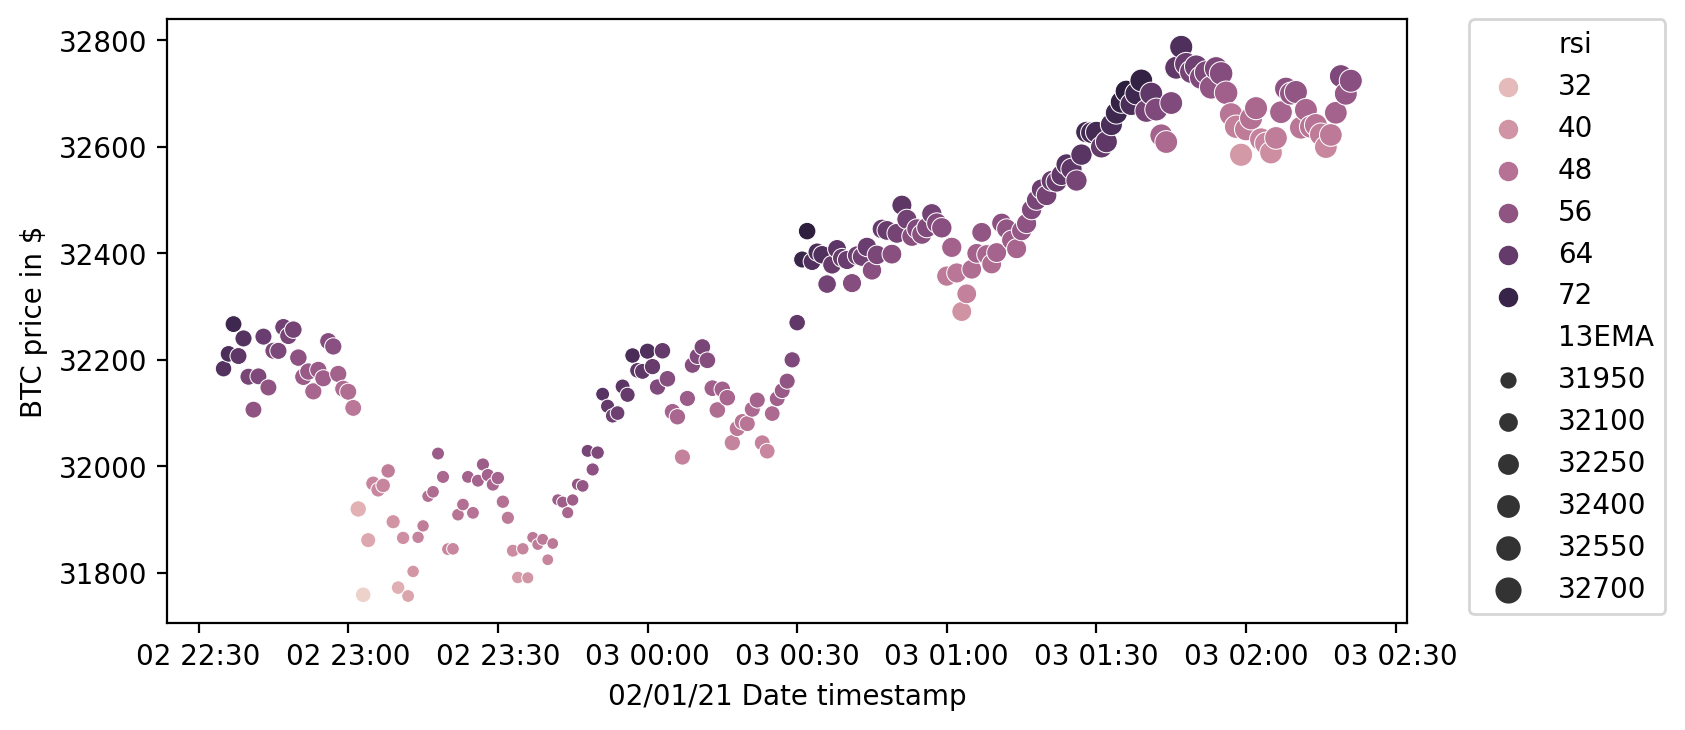

In [47]:
plt.figure(figsize=(8,4),dpi=200)
ax=sns.scatterplot(data=df_btcusd, x='Date',y='price',hue='rsi',size = '13EMA')
ax.set(xlabel='02/01/21 Date timestamp', ylabel='BTC price in $')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

As shown above, the trading strategy is clear:
### Sell: Sell when it is dark AND big
### Buy: Buy when it is light AND small 
Profit!